# 3장: 케라스와 텐서플로 소개

## 3.5 텐서플로 시작하기

### 3.5.1 상수 텐서와 변수

3-1 모두 1 또는 0인 텐서

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.ones(shape=(2,1))  # np.ones(shape=(2,1))과 동일
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2,1))  # np.zeros(shape=(2,1))과 동일
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


3-2 랜덤 텐서

In [ ]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1.)  # 평균 0, 표준편차 1인 정규분포에서 뽑은 랜덤한 값, np.random.normal(size=(3,1), loc=0., scale=1.)과 같
print(x)

tf.Tensor(
[[-1.7956871 ]
 [-0.22508152]
 [-0.5733359 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)  # 0과 1 사이의 균등분포에서 뽑은 랜덤한 값으로 만든 텐서, np.random.uniform(size=(3,1), low=0., high=1.)과 같
print(x)

tf.Tensor(
[[0.94280076]
 [0.4619665 ]
 [0.6170273 ]], shape=(3, 1), dtype=float32)


3-3 넘파이 배열에 값 할당하기

In [ ]:
import numpy as np

In [ ]:
x = np.ones(shape=(2, 2))
print("<before>")
print(x)
x[0, 0] = 0.
print("<after>")
print(x)

<before>
[[1. 1.]
 [1. 1.]]
<after>
[[0. 1.]
 [1. 1.]]


3-4 텐서플로 텐서에 값을 할당하지 못함

In [ ]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

3-5 텐서플로 변수 만들기

In [ ]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.7240684 ],
       [-0.7122551 ],
       [ 0.31443766]], dtype=float32)>


3-6 텐서플로 변수에 값 할당하기

In [ ]:
# assign하면서 값 변경 가능
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

3-7 변수 일부에 값 할당하기

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

3-8 assign_add() 사용해보기

In [ ]:
# 1로 이루어진 (3,1) 행렬에 v를 더하라
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### 3.5.2 텐서 연산: 텐서플로에서 수학 계산하기

3-9 기본적인 수학 연산

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c  # 원소별 덧셈
e = tf.matmul(a, b)  # 두 벡터의 점곱

In [ ]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
e *= d  # 두 텐서 곱하기 (원소별)

In [ ]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

### 3.5.3 Gradient API 다시 살펴보기

3-10 GradientTape 사용하기

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
input_var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [ ]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

3-11 상수텐서 입력과 함께 GradientTape 사용하기

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [ ]:
input_const

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [ ]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

3-12 그레디언트 테이프 중첩하여 이계도 그래디언트 계산하기

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [ ]:
time

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
position

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
speed # 9.8 * time

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
acceleration  # 9.8

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

## 3.5.4 End-to-End 예제: 텐서플로 선형 분류기

3-13 2D 평면에 두 클래스의 랜덤한 포인트 생성하기

In [ ]:
# 두 포인트 클라우드는 동일한 공분산 행렬 but 다른 평균 값 -> 같은 모양 다른 위치
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(  # 100개의 랜덤 포인트: cov=[[1. 0.5], [0.5, 1]] -> 왼쪽 아래에서 오른쪽 위로 향하는 타원형 포인트 클라우드 해당
    mean = [0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size= num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size= num_samples_per_class
)

In [ ]:
# negative samples의 좌표
negative_samples

array([[ 1.75002324,  3.23906779],
       [ 0.85209014,  2.69853733],
       [-1.10322525,  4.58192564],
       ...,
       [-0.67376479,  2.22678957],
       [ 1.16043381,  3.43257873],
       [-0.97341726,  3.43122047]])

In [ ]:
# positive samples의 좌표
positive_samples

array([[ 3.28746688, -0.1016464 ],
       [ 3.64168497,  0.84498849],
       [ 3.75250996,  1.97090842],
       ...,
       [ 3.90791107,  0.20390525],
       [ 3.49880088,  1.58096448],
       [ 3.30559883,  0.74461053]])

3-14 두 클래스를 (2000,2) 크기의 한 배열로 쌓기

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
# 세로로 (positive samples, negative samples) 쌓임
inputs

array([[ 1.7500232 ,  3.2390678 ],
       [ 0.8520901 ,  2.6985373 ],
       [-1.1032252 ,  4.581926  ],
       ...,
       [ 3.907911  ,  0.20390525],
       [ 3.498801  ,  1.5809644 ],
       [ 3.3055987 ,  0.74461055]], dtype=float32)

3-15 (0과 1로 구성된) 타깃 생성하기

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [ ]:
# 0, 1 순으로 samples 수 만큼 쌓임
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

3-16 두 클래스의 포인트를 그래프로 그리기

In [ ]:
import matplotlib.pyplot as plt

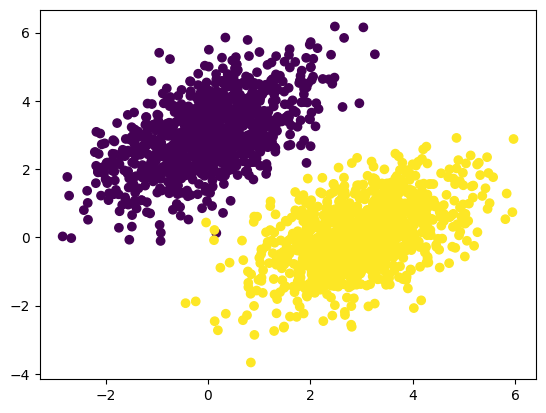

In [ ]:
# plt.scatter(x좌표, y좌표, color=targets의 0번째 열에 따라서)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

3-17 선형 분류기의 변수만들기

In [ ]:
input_dim = 2  # 입력은 2D
output_dim = 1  # 출력예측은 샘플 당 하나의 정수 (0 or 1 가까운 정수에 예측)
# W는 2개(2D 입력)의 스칼라 가중치 : w1, w2로 이루어짐 => W = [w1, w2]
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
# b는 스칼라 값
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

3-18 정방향 패스 함수

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

3-19 평균 제곱 오차 손실 함수

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions) # 각 샘플의 손실 값
  return tf.reduce_mean(per_sample_losses)  # reduce_mean ->샘플 당 손실 값을 하나의 스칼라 손실 값으로 평균

3-20 훈련 스텝 함수

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
  # GradientTape() 블록 안의 정방향 패스
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # 가중치에 대한 손실의 그래디언트
  # 가중치 업데이트
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

3-21 배치 훈련 루프

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 3.4168
1번째 스텝의 손실: 0.5557
2번째 스텝의 손실: 0.1901
3번째 스텝의 손실: 0.1346
4번째 스텝의 손실: 0.1197
5번째 스텝의 손실: 0.1107
6번째 스텝의 손실: 0.1030
7번째 스텝의 손실: 0.0961
8번째 스텝의 손실: 0.0899
9번째 스텝의 손실: 0.0841
10번째 스텝의 손실: 0.0789
11번째 스텝의 손실: 0.0741
12번째 스텝의 손실: 0.0697
13번째 스텝의 손실: 0.0658
14번째 스텝의 손실: 0.0621
15번째 스텝의 손실: 0.0588
16번째 스텝의 손실: 0.0558
17번째 스텝의 손실: 0.0530
18번째 스텝의 손실: 0.0505
19번째 스텝의 손실: 0.0482
20번째 스텝의 손실: 0.0461
21번째 스텝의 손실: 0.0442
22번째 스텝의 손실: 0.0424
23번째 스텝의 손실: 0.0408
24번째 스텝의 손실: 0.0394
25번째 스텝의 손실: 0.0381
26번째 스텝의 손실: 0.0368
27번째 스텝의 손실: 0.0357
28번째 스텝의 손실: 0.0347
29번째 스텝의 손실: 0.0338
30번째 스텝의 손실: 0.0330
31번째 스텝의 손실: 0.0322
32번째 스텝의 손실: 0.0315
33번째 스텝의 손실: 0.0309
34번째 스텝의 손실: 0.0303
35번째 스텝의 손실: 0.0297
36번째 스텝의 손실: 0.0292
37번째 스텝의 손실: 0.0288
38번째 스텝의 손실: 0.0284
39번째 스텝의 손실: 0.0280


In [ ]:
predictions = model(inputs)
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.3139843 ],
       [ 0.2146356 ],
       [-0.36662364],
       ...,
       [ 1.0695319 ],
       [ 0.83070445],
       [ 0.8951858 ]], dtype=float32)>

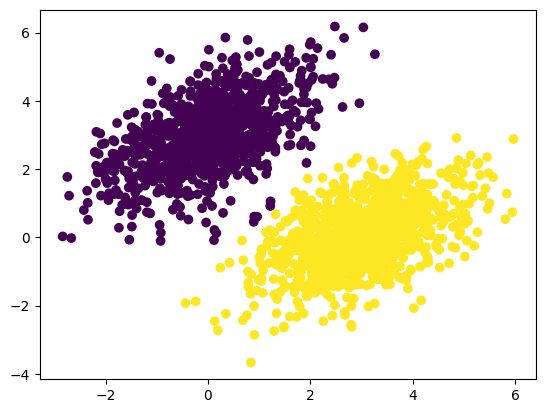

In [ ]:
# 0.5보다 작으면 0, 크면 1로 분류
plt.scatter(inputs[:, 0], inputs[:, 1], c= predictions[:, 0] > 0.5)

prediction == [[w1, w2]] ∙ [x, y] + b == w1 * x + w2 * y + b  
prediction < 0.5 -> 0 클래스, prediction > 0.5 -> 1 클래스

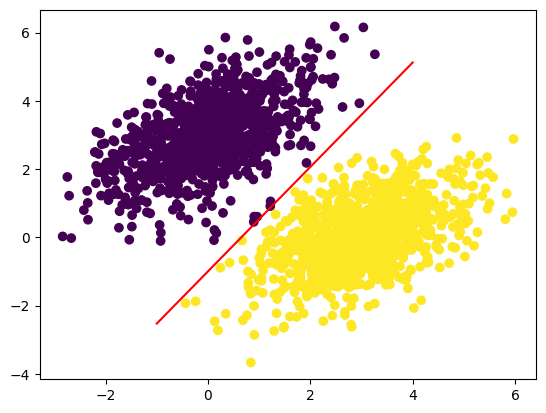

In [ ]:
# 구분하는 직선 -> y = -w1/w2 * x + (0.5-b)/w2
x = np.linspace(-1, 4, 100)  # -1~4 일정한 간격 갖도록 100개의 숫자 생성
y = -W[0] / W[1] * x + (0.5 - b) / W[1]  # 직선의 방정식
plt.plot(x, y, "-r") # -r: 빨간색
plt.scatter(inputs[:, 0], inputs[:, 1], c= predictions[:, 0] > 0.5)
plt.show()

3-22 Layer의 서브클래스로 구현한 Dense 층

In [4]:
from tensorflow import keras
import tensorflow as tf

In [7]:
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):  # 모든 케라스 층은 Layer 클래스를 상속
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):  # build() 메소드에 가중치를 생성
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),  # add_weight()는 가중치를 간편하게 만들 수 있는 메소드, 독립적으로 변수를 생성하고 층의 속성으로 할당 가능
                             initializer = "random_normal")
    self.b = self.add_weight(shape = (self.units,), initializer='zeros')

  def call(self, inputs):  # call 메소드에서 정방향 패스 계산을 정의
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [9]:
my_dense = SimpleDense(units=32, activation = tf.nn.relu)  # 앞서 정의한 층의 인스턴스를 생성
input_tensor = tf.ones(shape=(2, 784))  # 테스트 입력을 생성
output_tensor = my_dense(input_tensor)  # 이 입력으로 층을 함수처럼 호출
print(output_tensor.shape)

(2, 32)


In [14]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")  # 32개의 출력 유닛을 가진 밀집 층

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [12]:
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [25]:
# model = NaiveSequential([
#     NaiveDense(input_size=784, output_size=32, activation="relu"),
#     NaiveDense(input_size=32, output_size=64, activation="relu"),
#     NaiveDense(input_size=64, output_size=32, activation="relu"),
#     NaiveDense(input_size=32, output_size=10, activation="softmax")
# ])

In [24]:
# SimpleDense 클래스에서는 NaiveDense처럼 생성자에서 가중치를 만들지 X, 그 대신 상태 생성을 위한 전용 메소드인 build()에서 생성
# 기본 Layer 클래스의 __call__() 메소드
def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)

In [16]:
# 자동으로 크기 추론
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

compile 단계

In [18]:
model = keras.Sequential([keras.layers.Dense(1)])  # 선형 분류기 정의
model.compile(optimizer="rmsprop",  # 옵티마이저 지정
              loss = "mean_squared_error",  # 손실을 평균 제곱 오차로 지정
              metrics=["accuracy"])  # 측정 자료를 리스트로 지정)

In [19]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
# 사용자 지정 metric, loss도 가능
# model.compile(optimizer=keras.optimizer.RMSprop(learning_rate=1e-4),
#               loss=my_custom_loss,
#               metrics=[my_custom_metric1, my_custom_metric_2])

3-23 넘파이 데이터로 fit() 메소드 호출

In [21]:
history = model.fit(
    inputs,   # 입력 샘플(넘파이 배열)
    targets,  # 훈련 타깃(넘파이 배열)
    epochs=5,  # 훈련 루프 5번
    batch_size=128  # 훈련 루프는 128개의 샘플 배치로 데이터를 순회
)

history.history 하면 loss와 측정 지표 딕셔너리 형태로 출력

3-24 validation_data 매개변수 사용하기

In [28]:
import numpy as np

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# 검증 데이터에 한 클래스의 샘플만 포함되는 것을 막기 위해 랜덤하게 생성한 인덱스를 사용해서 입력과 타깃을 섞음
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# 훈련 입력과 타깃의 30%를 검증용을 떼어놓기, 검증 손실과 측정 지표 계산을 위해 훈련 데이터에서 이 샘플을 제외시켜 따로 보관
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fits(training_inputs,  # 훈련된 데이터는 모델의 가중치를 업데이트하는데 사용됨
           training_targets,
           epochs=5,
           batch_size=16,
           validation_data=(val_inputs, val_targets))  # 검증데이터는 검증 손실과 측정 지표를 모니터링하는데 사용됨

추론: 훈련한 모델 사용하기

In [ ]:
# prediction = model(new_inputs)

In [ ]:
predictions= model.predict(val_inputs, batch_size=128)
print(predictions[:10])